<b><center>MACHINE LEARNING</center></b>

<b><center>1.NAIVE BAYEES AND KNN</center></b>

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


<b>1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.</b>

<b><center>Vote is the target variable here</center></b>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import skew
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
import statistics
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,plot_confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [83]:
df=pd.read_excel('Election_Data.xlsx',sheet_name="Election_Dataset_Two Classes")

In [84]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [85]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [86]:
df.info()
#The data set contains 26967 row, 11 columns .
#In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features where 'price' is the target variable and all other are predector variable.
#The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.
#Exept depth, in all the column non null count is 26967.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [87]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [88]:
#df.skew()
df.skew().sort_values(ascending=False)
#calculating skewness before treating outliers present in the data.

Hague                      0.152100
age                        0.144621
Unnamed: 0                 0.000000
Europe                    -0.135947
economic.cond.household   -0.149552
economic.cond.national    -0.240453
political.knowledge       -0.426838
Blair                     -0.535419
dtype: float64

In [89]:
df.describe(include='all')

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,763.000000,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,440.373894,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,1.000000,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,382.000000,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,763.000000,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,1144.000000,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [90]:
df.isnull().sum()
#we can observe there are 697 missing value in the depth column. 

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
for column in df[['vote', 'economic.cond.national', 'economic.cond.household','Blair','Hague','Europe','political.knowledge','gender' ]]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [93]:
# drop the serial no column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [94]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [95]:
#df.skew()
df.skew().sort_values(ascending=False)
#calculating skewness before treating outliers present in the data.

Hague                      0.152100
age                        0.144621
Europe                    -0.135947
economic.cond.household   -0.149552
economic.cond.national    -0.240453
political.knowledge       -0.426838
Blair                     -0.535419
dtype: float64

<b>1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.</b>

In [96]:
df.shape

(1525, 9)

<b><center>CONTINUOUS VARIABLES</center></b>

In [17]:
print('Range of values: ', df['age'].max()-df['age'].min())
#Central values 
print('Minimum age: ', df['age'].min())
print('Maximum age: ',df['age'].max())
print('Mean value: ', df['age'].mean())
print('Mode value: ', df['age'].mode())
print('Median value: ',df['age'].median())
print('Standard deviation: ', df['age'].std())
print('Null values: ',df['age'].isnull().any())
#Quartiles

Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)
print('age - 1st Quartile (Q1) is: ', Q1)
print('age - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of age is ', stats.iqr(df['age']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

print('Number of outliers in age upper : ', df[df['age']>24.8575]['age'].count())
print('Number of outliers in age lower : ', df[df['age']<4.717499]['age'].count())
print('% of Outlier in age upper: ',round(df[df['age']>24.8575]['age'].count()*100/len(df)), '%')
print('% of Outlier in age lower: ',round(df[df['age']<4.717499]['age'].count()*100/len(df)), '%')

Range of values:  69
Minimum age:  24
Maximum age:  93
Mean value:  54.18229508196721
Mode value:  0    37
dtype: int64
Median value:  53.0
Standard deviation:  15.711208571641977
Null values:  False
age - 1st Quartile (Q1) is:  41.0
age - 3st Quartile (Q3) is:  67.0
Interquartile range (IQR) of age is  26.0
Lower outliers in age:  2.0
Upper outliers in age:  106.0
Number of outliers in age upper :  1514
Number of outliers in age lower :  0
% of Outlier in age upper:  99 %
% of Outlier in age lower:  0 %


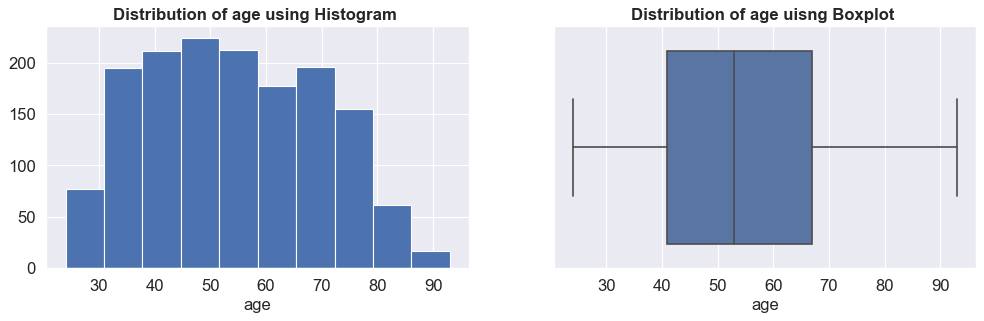

<Figure size 432x288 with 0 Axes>

In [18]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['age'])
plt.xlabel('age', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of age using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='age',data=df)
plt.xlabel('age', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of age uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


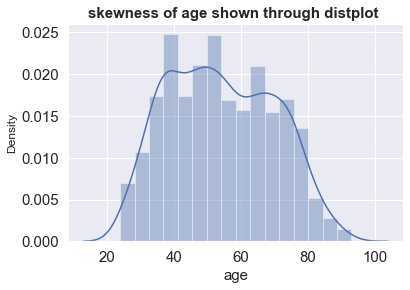

In [19]:
#distplot
sns.distplot(df['age'])
plt.xlabel('age', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of age shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

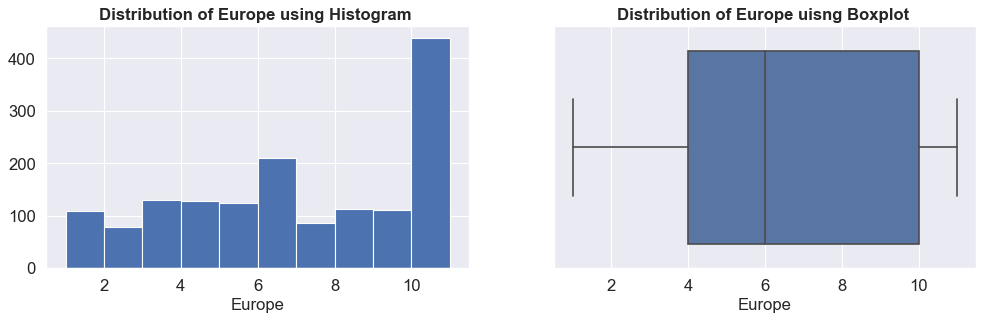

<Figure size 432x288 with 0 Axes>

In [28]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['Europe'])
plt.xlabel('Europe', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of Europe using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Europe',data=df)
plt.xlabel('Europe', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of Europe uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


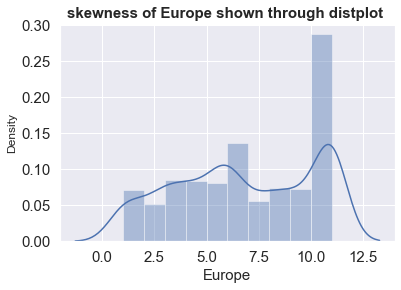

In [27]:
#distplot
sns.distplot(df['Europe'])
plt.xlabel('Europe', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of Europe shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

<center><b>CATEGORICAL COLUMNS</b></center>

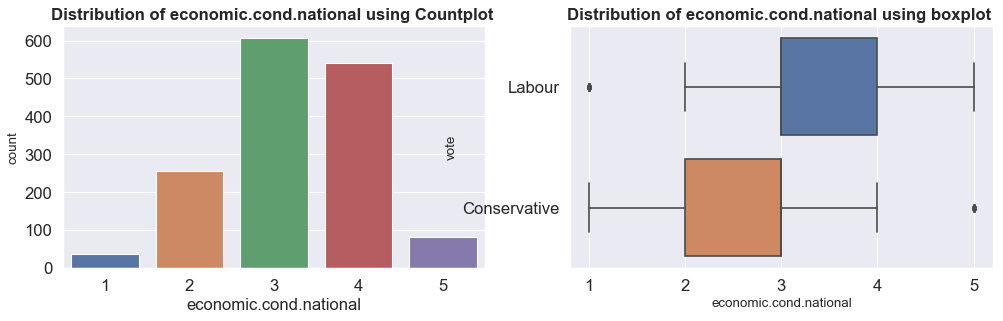

<Figure size 432x288 with 0 Axes>

In [20]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='economic.cond.national')
plt.xlabel('economic.cond.national', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of economic.cond.national using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='economic.cond.national',y='vote',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of economic.cond.national using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

#The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

In [22]:
print('Range of values: ', df['economic.cond.national'].max()-df['economic.cond.national'].min())
#Central values 
print('Minimum value for economic.cond.national: ', df['economic.cond.national'].min())
print('Maximum value for economic.cond.national: ',df['economic.cond.national'].max())
print('Mean value: ', df['economic.cond.national'].mean())
print('Mode value: ', df['economic.cond.national'].mode())
print('Median value: ',df['economic.cond.national'].median())
print('Standard deviation: ', df['economic.cond.national'].std())
print('Null values: ',df['economic.cond.national'].isnull().any())
#Quartiles

Q1=df['economic.cond.national'].quantile(q=0.25)
Q3=df['economic.cond.national'].quantile(q=0.75)
print('economic.cond.national - 1st Quartile (Q1) is: ', Q1)
print('economic.cond.national - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of economic.cond.national is ', stats.iqr(df['economic.cond.national']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in economic.cond.national: ', L_outliers)
print('Upper outliers in economic.cond.national: ', U_outliers)

print('Number of outliers in economic.cond.national upper : ', df[df['economic.cond.national']>24.8575]['economic.cond.national'].count())
print('Number of outliers in economic.cond.national lower : ', df[df['economic.cond.national']<4.717499]['economic.cond.national'].count())
print('% of Outlier in economic.cond.national upper: ',round(df[df['economic.cond.national']>24.8575]['economic.cond.national'].count()*100/len(df)), '%')
print('% of Outlier in economic.cond.national lower: ',round(df[df['economic.cond.national']<4.717499]['economic.cond.national'].count()*100/len(df)), '%')

Range of values:  4
Minimum value for economic.cond.national:  1
Maximum value for economic.cond.national:  5
Mean value:  3.2459016393442623
Mode value:  0    3
dtype: int64
Median value:  3.0
Standard deviation:  0.8809692844149642
Null values:  False
economic.cond.national - 1st Quartile (Q1) is:  3.0
economic.cond.national - 3st Quartile (Q3) is:  4.0
Interquartile range (IQR) of economic.cond.national is  1.0
Lower outliers in economic.cond.national:  1.5
Upper outliers in economic.cond.national:  5.5
Number of outliers in economic.cond.national upper :  0
Number of outliers in economic.cond.national lower :  1443
% of Outlier in economic.cond.national upper:  0 %
% of Outlier in economic.cond.national lower:  95 %


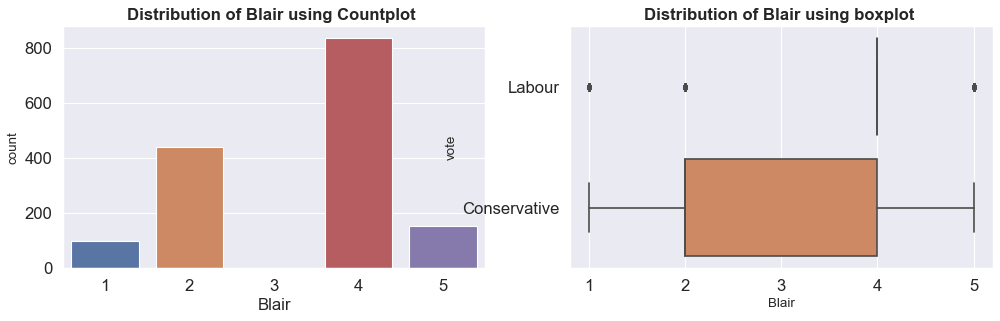

<Figure size 432x288 with 0 Axes>

In [21]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='Blair')
plt.xlabel('Blair', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Blair using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Blair',y='vote',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Blair using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


In [23]:
print('Range of values: ', df['Blair'].max()-df['Blair'].min())
#Central values 
print('Minimum value for Blair: ', df['Blair'].min())
print('Maximum value for Blair: ',df['Blair'].max())
print('Mean value: ', df['Blair'].mean())
print('Mode value: ', df['Blair'].mode())
print('Median value: ',df['Blair'].median())
print('Standard deviation: ', df['Blair'].std())
print('Null values: ',df['Blair'].isnull().any())
#Quartiles

Q1=df['Blair'].quantile(q=0.25)
Q3=df['Blair'].quantile(q=0.75)
print('Blair - 1st Quartile (Q1) is: ', Q1)
print('Blair - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Blair is ', stats.iqr(df['Blair']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Blair: ', L_outliers)
print('Upper outliers in Blair: ', U_outliers)

print('Number of outliers in Blair upper : ', df[df['Blair']>24.8575]['Blair'].count())
print('Number of outliers in Blair lower : ', df[df['Blair']<4.717499]['Blair'].count())
print('% of Outlier in Blair upper: ',round(df[df['Blair']>24.8575]['Blair'].count()*100/len(df)), '%')
print('% of Outlier in Blair lower: ',round(df[df['Blair']<4.717499]['Blair'].count()*100/len(df)), '%')

Range of values:  4
Minimum value for Blair:  1
Maximum value for Blair:  5
Mean value:  3.3344262295081966
Mode value:  0    4
dtype: int64
Median value:  4.0
Standard deviation:  1.1748241123034677
Null values:  False
Blair - 1st Quartile (Q1) is:  2.0
Blair - 3st Quartile (Q3) is:  4.0
Interquartile range (IQR) of Blair is  2.0
Lower outliers in Blair:  -1.0
Upper outliers in Blair:  7.0
Number of outliers in Blair upper :  0
Number of outliers in Blair lower :  1372
% of Outlier in Blair upper:  0 %
% of Outlier in Blair lower:  90 %


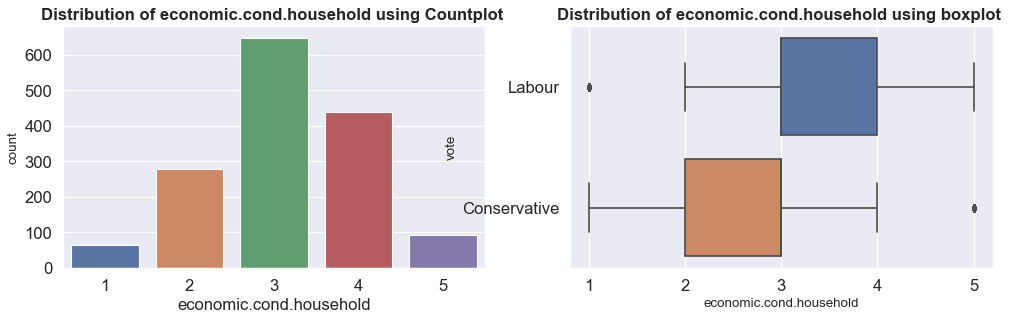

<Figure size 432x288 with 0 Axes>

In [22]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='economic.cond.household')
plt.xlabel('economic.cond.household', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of economic.cond.household using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='economic.cond.household',y='vote', data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of economic.cond.household using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()
#The Diamonds clarity with VS1 & VS2 are the most Expensive.

In [24]:
print('Range of values: ', df['economic.cond.household'].max()-df['economic.cond.household'].min())
#Central values 
print('Minimum value for economic.cond.household: ', df['economic.cond.household'].min())
print('Maximum value for economic.cond.household: ',df['economic.cond.household'].max())
print('Mean value: ', df['economic.cond.household'].mean())
print('Mode value: ', df['economic.cond.household'].mode())
print('Median value: ',df['economic.cond.household'].median())
print('Standard deviation: ', df['economic.cond.household'].std())
print('Null values: ',df['economic.cond.household'].isnull().any())
#Quartiles

Q1=df['economic.cond.household'].quantile(q=0.25)
Q3=df['economic.cond.household'].quantile(q=0.75)
print('economic.cond.household - 1st Quartile (Q1) is: ', Q1)
print('economic.cond.household - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of economic.cond.household is ', stats.iqr(df['economic.cond.household']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in economic.cond.household: ', L_outliers)
print('Upper outliers in economic.cond.household: ', U_outliers)

print('Number of outliers in economic.cond.household upper : ', df[df['economic.cond.household']>24.8575]['economic.cond.household'].count())
print('Number of outliers in economic.cond.household lower : ', df[df['economic.cond.household']<4.717499]['economic.cond.household'].count())
print('% of Outlier in economic.cond.household upper: ',round(df[df['economic.cond.household']>24.8575]['economic.cond.household'].count()*100/len(df)), '%')
print('% of Outlier in economic.cond.household lower: ',round(df[df['economic.cond.household']<4.717499]['economic.cond.household'].count()*100/len(df)), '%')

Range of values:  4
Minimum value for economic.cond.household:  1
Maximum value for economic.cond.household:  5
Mean value:  3.140327868852459
Mode value:  0    3
dtype: int64
Median value:  3.0
Standard deviation:  0.9299513985782148
Null values:  False
economic.cond.household - 1st Quartile (Q1) is:  3.0
economic.cond.household - 3st Quartile (Q3) is:  4.0
Interquartile range (IQR) of economic.cond.household is  1.0
Lower outliers in economic.cond.household:  1.5
Upper outliers in economic.cond.household:  5.5
Number of outliers in economic.cond.household upper :  0
Number of outliers in economic.cond.household lower :  1433
% of Outlier in economic.cond.household upper:  0 %
% of Outlier in economic.cond.household lower:  94 %


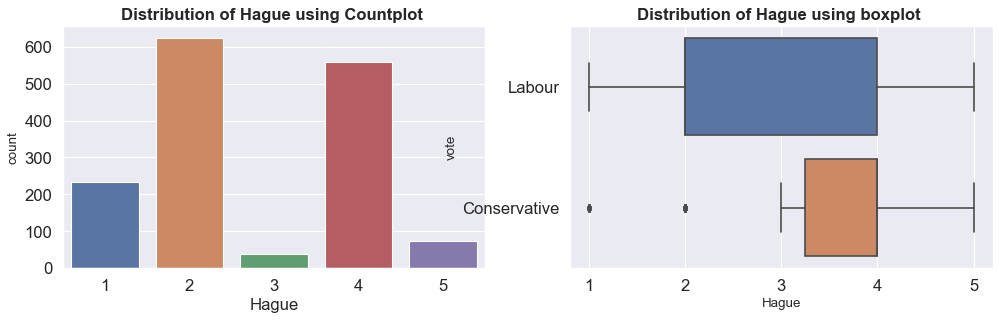

<Figure size 432x288 with 0 Axes>

In [23]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='Hague')
plt.xlabel('Hague', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Hague using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Hague',y='vote', data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Hague using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [21]:
print('Range of values: ', df['Hague'].max()-df['Hague'].min())
#Central values 
print('Minimum value for Hague: ', df['Hague'].min())
print('Maximum value for Hague: ',df['Hague'].max())
print('Mean value: ', df['Hague'].mean())
print('Mode value: ', df['Hague'].mode())
print('Median value: ',df['Hague'].median())
print('Standard deviation: ', df['Hague'].std())
print('Null values: ',df['Hague'].isnull().any())
#Quartiles

Q1=df['Hague'].quantile(q=0.25)
Q3=df['Hague'].quantile(q=0.75)
print('Hague - 1st Quartile (Q1) is: ', Q1)
print('Hague - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Hague is ', stats.iqr(df['Blair']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Hague: ', L_outliers)
print('Upper outliers in Hague: ', U_outliers)

print('Number of outliers in Hague upper : ', df[df['Hague']>24.8575]['Hague'].count())
print('Number of outliers in Hague lower : ', df[df['Hague']<4.717499]['Hague'].count())
print('% of Outlier in Hague upper: ',round(df[df['Hague']>24.8575]['Hague'].count()*100/len(df)), '%')
print('% of Outlier in Hague lower: ',round(df[df['Hague']<4.717499]['Hague'].count()*100/len(df)), '%')

Range of values:  4
Minimum value for Hague:  1
Maximum value for Hague:  5
Mean value:  2.7468852459016393
Mode value:  0    2
dtype: int64
Median value:  2.0
Standard deviation:  1.2307034736168108
Null values:  False
Hague - 1st Quartile (Q1) is:  2.0
Hague - 3st Quartile (Q3) is:  4.0
Interquartile range (IQR) of Hague is  2.0
Lower outliers in Hague:  -1.0
Upper outliers in Hague:  7.0
Number of outliers in Hague upper :  0
Number of outliers in Hague lower :  1452
% of Outlier in Hague upper:  0 %
% of Outlier in Hague lower:  95 %


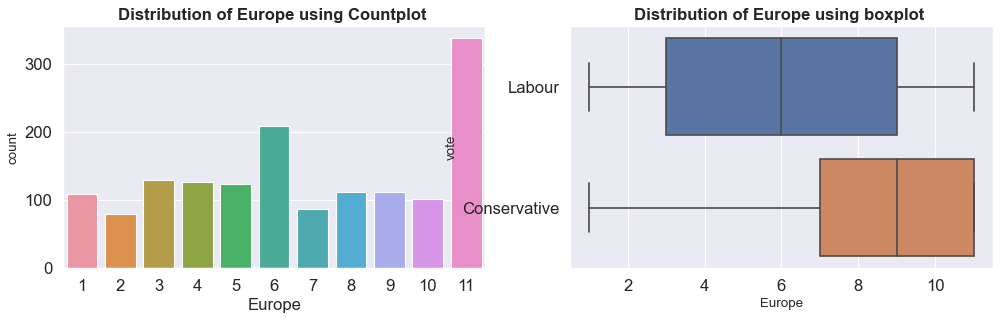

<Figure size 432x288 with 0 Axes>

In [24]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='Europe')
plt.xlabel('Europe', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Europe using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Europe',y='vote', data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Europe using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [20]:
print('Range of values: ', df['Europe'].max()-df['Europe'].min())
#Central values 
print('Minimum value for Europe: ', df['Europe'].min())
print('Maximum  value for Europe: ',df['Europe'].max())
print('Mean value: ', df['Europe'].mean())
print('Mode value: ', df['Europe'].mode())
print('Median value: ',df['Europe'].median())
print('Standard deviation: ', df['Europe'].std())
print('Null values: ',df['Europe'].isnull().any())
#Quartiles

Q1=df['Europe'].quantile(q=0.25)
Q3=df['Europe'].quantile(q=0.75)
print('Europe - 1st Quartile (Q1) is: ', Q1)
print('Europe - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Europe is ', stats.iqr(df['Europe']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Europe: ', L_outliers)
print('Upper outliers in Europe: ', U_outliers)

print('Number of outliers in Europe upper : ', df[df['Europe']>24.8575]['Europe'].count())
print('Number of outliers in Europelower : ', df[df['Europe']<4.717499]['Europe'].count())
print('% of Outlier in Europe upper: ',round(df[df['Europe']>24.8575]['Europe'].count()*100/len(df)), '%')
print('% of Outlier in Europe lower: ',round(df[df['Europe']<4.717499]['Europe'].count()*100/len(df)), '%')

Range of values:  10
Minimum value for Europe:  1
Maximum  value for Europe:  11
Mean value:  6.728524590163935
Mode value:  0    11
dtype: int64
Median value:  6.0
Standard deviation:  3.297538370463229
Null values:  False
Europe - 1st Quartile (Q1) is:  4.0
Europe - 3st Quartile (Q3) is:  10.0
Interquartile range (IQR) of Europe is  6.0
Lower outliers in Europe:  -5.0
Upper outliers in Europe:  19.0
Number of outliers in Europe upper :  0
Number of outliers in Europelower :  444
% of Outlier in Europe upper:  0 %
% of Outlier in Europe lower:  29 %


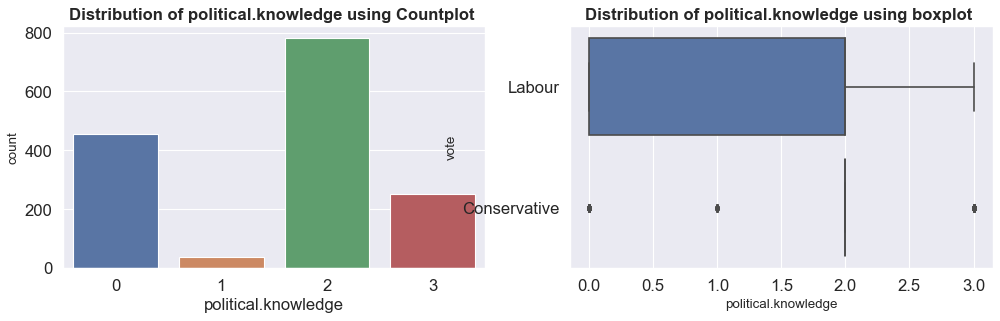

<Figure size 432x288 with 0 Axes>

In [25]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='political.knowledge')
plt.xlabel('political.knowledge', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of political.knowledge using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='political.knowledge',y='vote', data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of political.knowledge using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [25]:
print('Range of values: ', df['political.knowledge'].max()-df['political.knowledge'].min())
#Central values 
print('Minimum value for political.knowledge: ', df['political.knowledge'].min())
print('Maximum value for political.knowledge: ',df['political.knowledge'].max())
print('Mean value: ', df['political.knowledge'].mean())
print('Mode value: ', df['political.knowledge'].mode())
print('Median value: ',df['political.knowledge'].median())
print('Standard deviation: ', df['political.knowledge'].std())
print('Null values: ',df['political.knowledge'].isnull().any())
#Quartiles

Q1=df['political.knowledge'].quantile(q=0.25)
Q3=df['political.knowledge'].quantile(q=0.75)
print('political.knowledge - 1st Quartile (Q1) is: ', Q1)
print('political.knowledge - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of political.knowledge is ', stats.iqr(df['political.knowledge']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in political.knowledge: ', L_outliers)
print('Upper outliers in political.knowledge: ', U_outliers)

print('Number of outliers in political.knowledge upper : ', df[df['Blair']>24.8575]['political.knowledge'].count())
print('Number of outliers in political.knowledge lower : ', df[df['Blair']<4.717499]['political.knowledge'].count())
print('% of Outlier in political.knowledge upper: ',round(df[df['Blair']>24.8575]['political.knowledge'].count()*100/len(df)), '%')
print('% of Outlier in political.knowledge lower: ',round(df[df['Blair']<4.717499]['political.knowledge'].count()*100/len(df)), '%')

Range of values:  3
Minimum value for political.knowledge:  0
Maximum value for political.knowledge:  3
Mean value:  1.5422950819672132
Mode value:  0    2
dtype: int64
Median value:  2.0
Standard deviation:  1.0833147486432724
Null values:  False
political.knowledge - 1st Quartile (Q1) is:  0.0
political.knowledge - 3st Quartile (Q3) is:  2.0
Interquartile range (IQR) of political.knowledge is  2.0
Lower outliers in political.knowledge:  -3.0
Upper outliers in political.knowledge:  5.0
Number of outliers in political.knowledge upper :  0
Number of outliers in political.knowledge lower :  1372
% of Outlier in political.knowledge upper:  0 %
% of Outlier in political.knowledge lower:  90 %


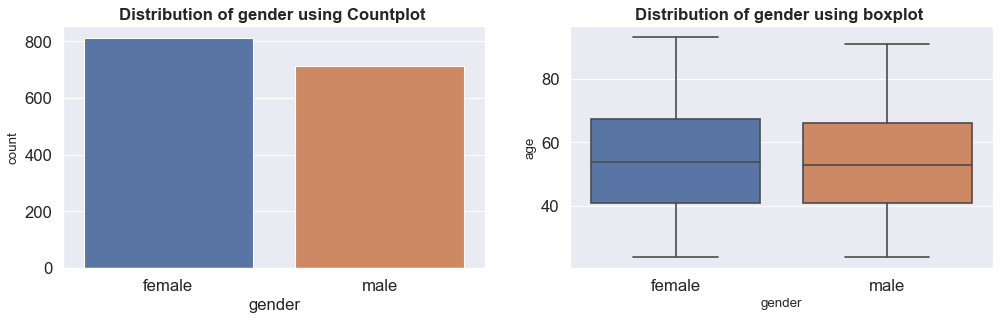

<Figure size 432x288 with 0 Axes>

In [26]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='gender')
plt.xlabel('gender', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of gender using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='gender',y='age', data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of gender using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

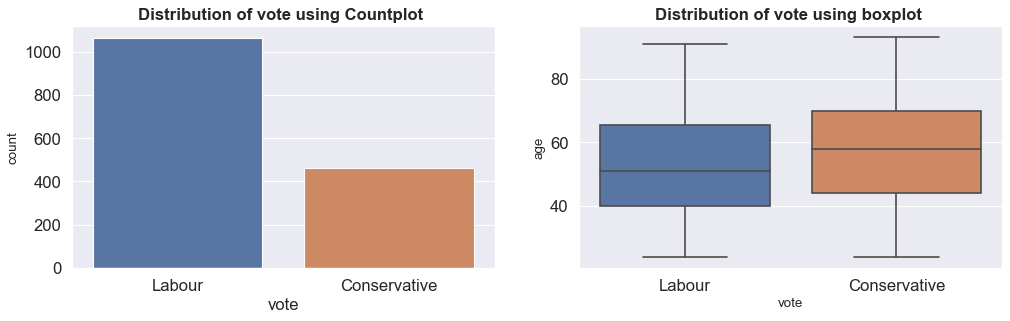

<Figure size 432x288 with 0 Axes>

In [27]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='vote')
plt.xlabel('vote', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of vote using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='vote',y='age', data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of vote using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

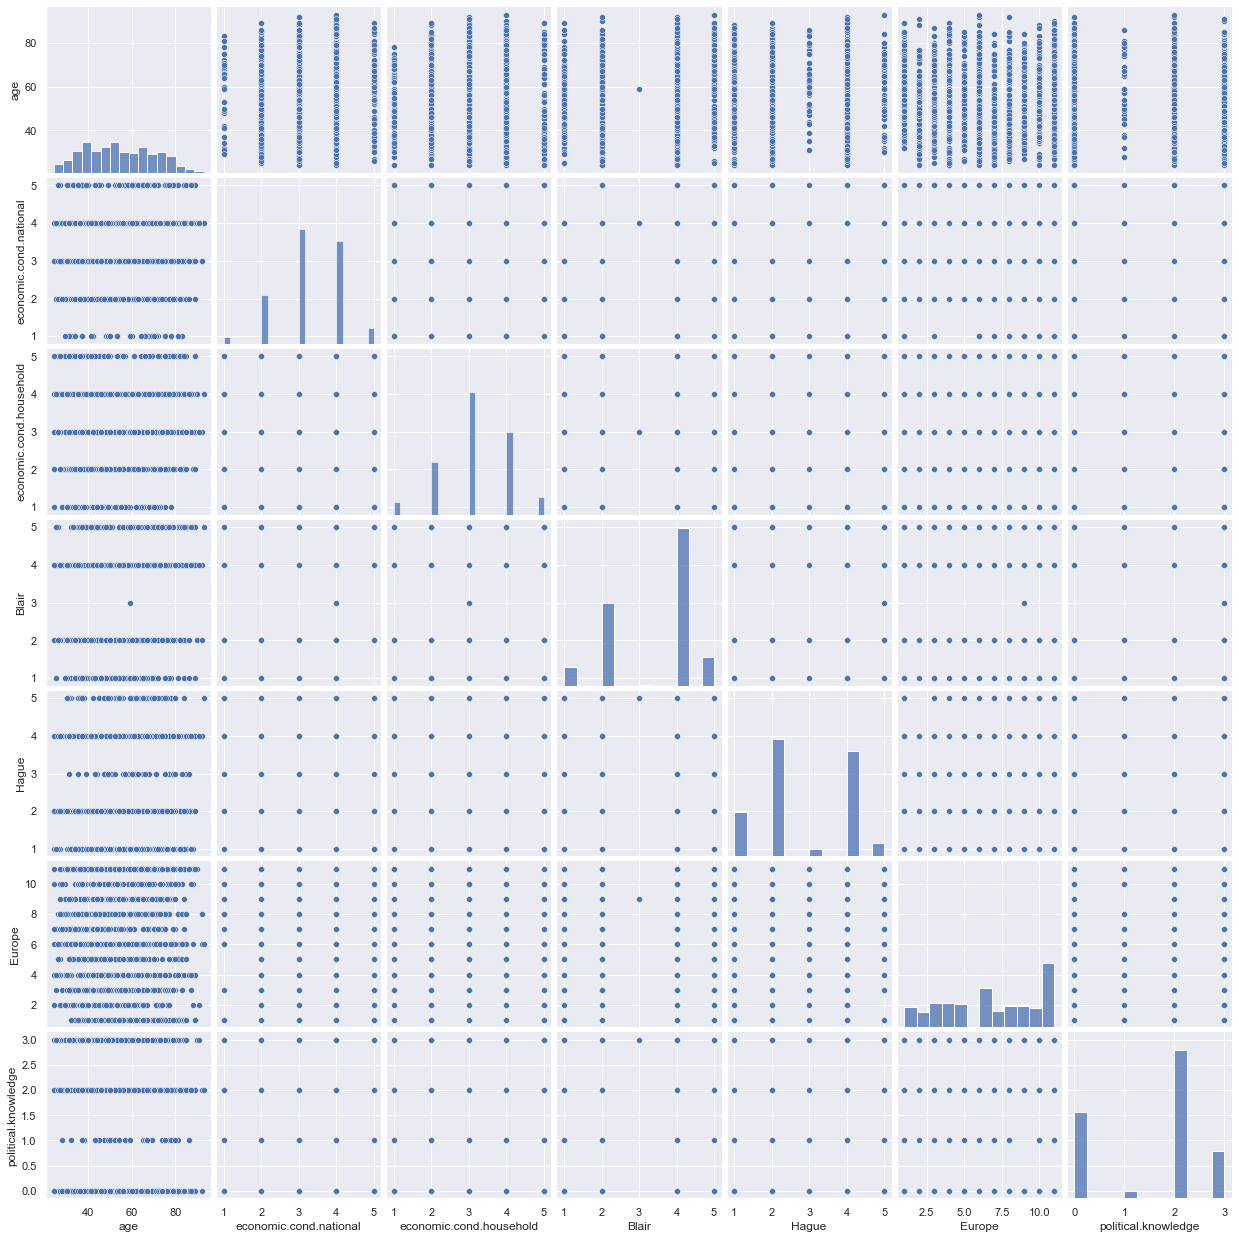

In [52]:
sns.pairplot(df)
plt.show()

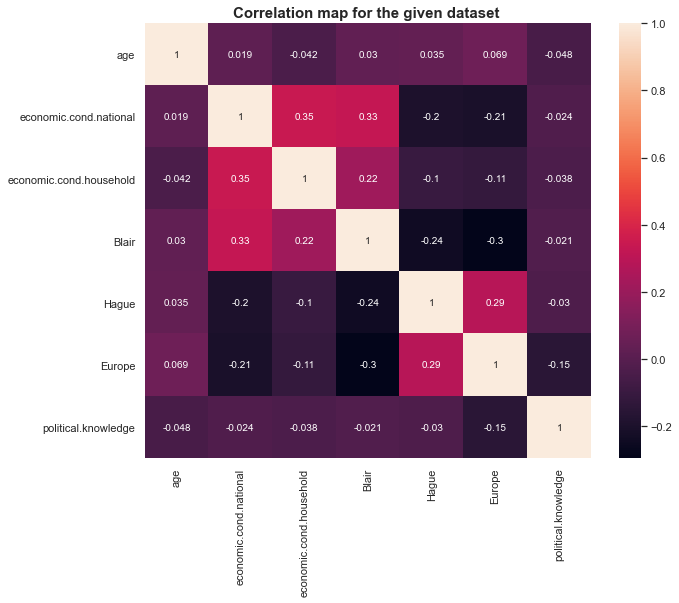

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation map for the given dataset ', fontsize=15,fontweight='bold')

plt.show()

In [74]:
#How each feature affects the price of diamonds.
correlations=df.corr()
correlations["age"].sort_values(ascending=False)
#It can be inferred that most features correlate with the price of Diamond. 
#The notable exception is "depth" which has a negligible correlation (<1%).

age                        1.000000
Europe                     0.068880
Hague                      0.034626
Blair                      0.030218
economic.cond.national     0.018567
economic.cond.household   -0.041587
political.knowledge       -0.048490
Name: age, dtype: float64

In [97]:
df.shape

(1525, 9)

<b>b)Impute null values</b>

In [98]:
#checking for null values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [99]:
df.mean()

age                        54.182295
economic.cond.national      3.245902
economic.cond.household     3.140328
Blair                       3.334426
Hague                       2.746885
Europe                      6.728525
political.knowledge         1.542295
dtype: float64

<b>1.3)Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.</b>

<b>After encoding, do the scaling</b>

<center><b>ENCODING STRING DATA VALUES USING ONE HOT ENCODING</b></center>

In [100]:
cat1=['vote','gender']

In [101]:
df1=pd.get_dummies(df,columns=cat1,drop_first=True)

In [102]:
df1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [103]:
# Arrange data into independent variables and dependent variables
#X =  df1.drop('vote_Labour',axis=1) ## Features
#y = df1['vote_Labour']  ## Target

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
 7   vote_Labour              1525 non-null   uint8
 8   gender_male              1525 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 86.5 KB


<b><center>SCALING</center></b>

In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
columns=['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']
df[columns].var()

age                        246.842075
economic.cond.national       0.776107
economic.cond.household      0.864810
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
dtype: float64

In [22]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

#X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender_male"]]=X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender_male"]].apply(zscore)
#df1  = df_new.apply(zscore)  # convert all attributes to Z scale 
num=['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']
df1[num] = df1[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
#df1.describe().T

In [23]:
df1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,1,0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1,1
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1,1
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,1,0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1,1


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1525 non-null   float64
 1   economic.cond.national   1525 non-null   float64
 2   economic.cond.household  1525 non-null   float64
 3   Blair                    1525 non-null   float64
 4   Hague                    1525 non-null   float64
 5   Europe                   1525 non-null   float64
 6   political.knowledge      1525 non-null   float64
 7   vote_Labour              1525 non-null   uint8  
 8   gender_male              1525 non-null   uint8  
dtypes: float64(7), uint8(2)
memory usage: 86.5 KB


<b>b)Splitting the data into train and test</b>

In [105]:
# Copy all the predictor variables into X dataframe. Since 'vote_Labour' is dependent variable drop it
X = df1.drop('vote_Labour', axis=1)


# Copy the 'vote_Labour' column alone into the y dataframe. This is the dependent variable
y = df1[['vote_Labour']]

In [106]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [107]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

<b>1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)</b>

<center><b>LOGISTIC REGRESSION</b></center>

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
Logistic_model=LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [30]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print(Logistic_model_score)
print('')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('')
print(metrics.classification_report(y_train,y_train_predict))

0.8406747891283973

[[230 102]
 [ 68 667]]

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [31]:
print('accuracy of train dataset:',Logistic_model_score)

accuracy of train dataset: 0.8406747891283973


In [32]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[230 102]
 [ 68 667]]


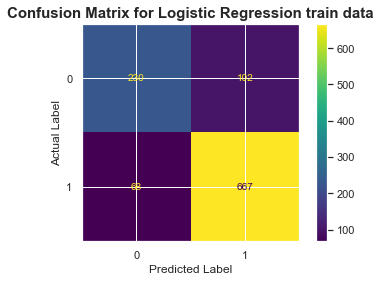

In [33]:
plot_confusion_matrix(Logistic_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression train data',fontsize=15,fontweight='bold')
plt.show()

In [34]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.616214,0.383786
1,0.186460,0.813540
2,0.187994,0.812006
3,0.163937,0.836063
4,0.052483,0.947517


In [35]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,y_test)
print(Logistic_model_score)
print('')
print(metrics.confusion_matrix(y_test,y_test_predict))
print('')
print(metrics.classification_report(y_test,y_test_predict))

0.8231441048034934

[[ 85  45]
 [ 36 292]]

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [36]:
print('accuracy of test dataset:',Logistic_model_score)

accuracy of test dataset: 0.8231441048034934


In [37]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[ 85  45]
 [ 36 292]]


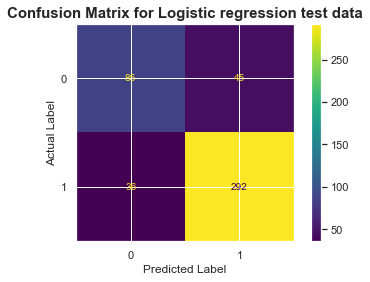

In [38]:
plot_confusion_matrix(Logistic_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic regression test data',fontsize=15,fontweight='bold')
plt.show()

In [39]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.933648,0.066352
1,0.689193,0.310807
2,0.333480,0.666520
3,0.477407,0.522593
4,0.157152,0.842848


ROC_AUC score: 0.889


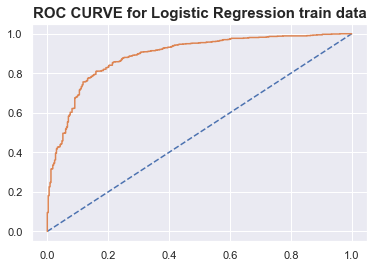

In [40]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Logistic Regression train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

ROC_AUC score: 0.882


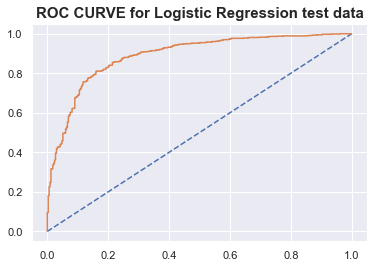

In [41]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('ROC_AUC score: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC CURVE for Logistic Regression test data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

Feature: 0, Score: -1.42639
Feature: 1, Score: 1.35026
Feature: 2, Score: 0.63641
Feature: 3, Score: 2.29853
Feature: 4, Score: -3.35191
Feature: 5, Score: -2.37533
Feature: 6, Score: -1.44802
Feature: 7, Score: 0.29922


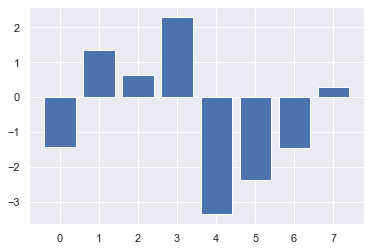

In [42]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
# get importance
importance = Logistic_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [43]:
# View the Intercept and Coefficents:::

print(Logistic_model.coef_ )#Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print(Logistic_model.intercept_)  #Prints value for intercept/b0 
print(pd.DataFrame(zip(X_train.columns, np.transpose(Logistic_model.coef_.tolist()[0])), columns=['features', 'coef']))

# Due to the logit function, logistic regression coefficients represent the log odds that an observation is in the target 
# class (“1”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular odds 
# in order to make sense of them. This is done by simply exponentiating the log odds coefficients - using np.exp()

odds = np.exp(Logistic_model.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

#

[[-1.42639251  1.35025628  0.63640837  2.29853182 -3.35191411 -2.37533443
  -1.44801964  0.29922338]]
[2.92273291]
                  features      coef
0                      age -1.426393
1   economic.cond.national  1.350256
2  economic.cond.household  0.636408
3                    Blair  2.298532
4                    Hague -3.351914
5                   Europe -2.375334
6      political.knowledge -1.448020
7              gender_male  0.299223


,coef
Blair,9.959549
economic.cond.national,3.858414
economic.cond.household,1.889682
gender_male,1.348811
age,0.240174
political.knowledge,0.235035
Europe,0.092983
Hague,0.035017


<b><center>Applying Grid Search on Logistic Regression model</center></b>

In [65]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}



In [66]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')


In [69]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [70]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [71]:
best_model = grid_search.best_estimator_

In [72]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [73]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.915066,0.084934
1,0.670191,0.329809
2,0.333248,0.666752
3,0.469968,0.530032
4,0.176900,0.823100


In [74]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       332
           1       0.86      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067
 



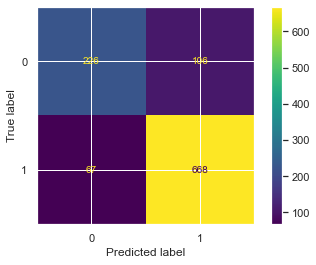

In [54]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

In [55]:
print('accuracy of Logistic Regression train dataset after grid search CV:',best_model.score(X_train,y_train))

accuracy of Logistic Regression train dataset after grid search CV: 0.837863167760075


In [56]:
print('accuracy of Logistic Regression test dataset after grid search CV:',best_model.score(X_test,y_test))

accuracy of Logistic Regression test dataset after grid search CV: 0.8209606986899564


              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



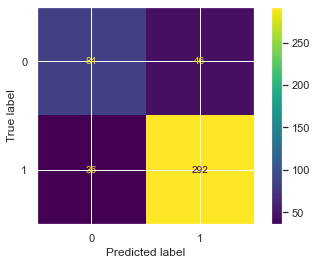

In [57]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

<b>ROC CURVE FOR TRAINING DATA AFTER GRID SEARCH</b>

ROC_AUC score: 0.890


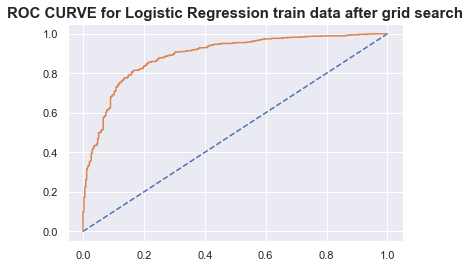

In [58]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Logistic Regression train data after grid search',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

<b>ROC CURVE FOR TESTING DATA AFTER GRID SEARCH</b>

ROC_AUC score: 0.883


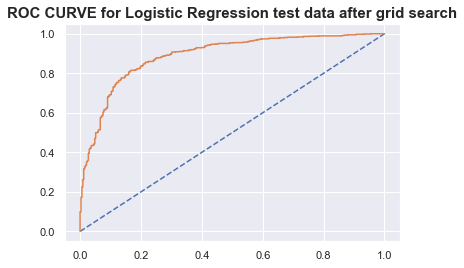

In [59]:
probs_test = best_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('ROC_AUC score: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC CURVE for Logistic Regression test data after grid search',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

<center><b>LDA</b></center>

In [200]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [201]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [202]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)
print('')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('')
print(metrics.classification_report(y_train,y_train_predict))

0.8369259606373008

[[233  99]
 [ 75 660]]

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [203]:
print('accuracy of train dataset:',LDA_model_score)

accuracy of train dataset: 0.8369259606373008


In [204]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[233  99]
 [ 75 660]]


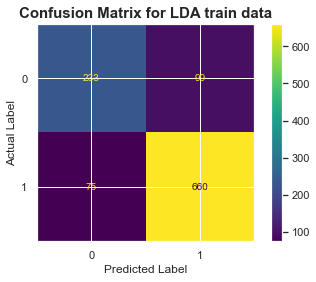

In [205]:
plot_confusion_matrix(LDA_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for LDA train data',fontsize=15,fontweight='bold')
plt.show()

In [206]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)
print('')
print(metrics.confusion_matrix(y_test,y_test_predict))
print('')
print(metrics.classification_report(y_test,y_test_predict))

0.8187772925764192

[[ 86  44]
 [ 39 289]]

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [207]:
print('accuracy of test dataset:',LDA_model_score)

accuracy of test dataset: 0.8187772925764192


In [208]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[ 86  44]
 [ 39 289]]


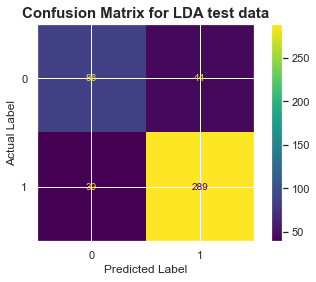

In [209]:
plot_confusion_matrix(LDA_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for LDA test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score : 0.889 


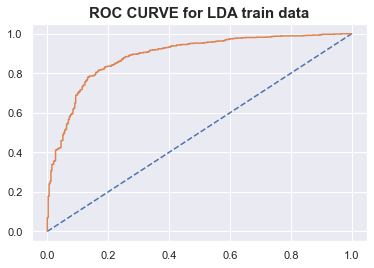

In [210]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("ROC_AUC score : %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for LDA train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr,train_tpr);

ROC_AUC score: 0.884 


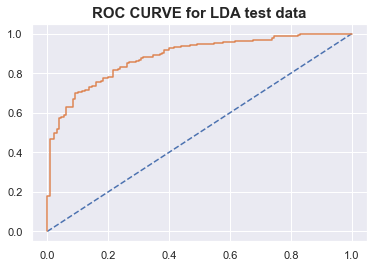

In [211]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score: %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for LDA test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);

In [212]:
# View the Intercept and Coefficents:::

print(LDA_model.coef_ )#Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print(LDA_model.intercept_)  #Prints value for intercept/b0 
print(pd.DataFrame(zip(X_train.columns, np.transpose(LDA_model.coef_.tolist()[0])), columns=['features', 'coef']))

# Due to the logit function, logistic regression coefficients represent the log odds that an observation is in the target 
# class (“1”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular odds 
# in order to make sense of them. This is done by simply exponentiating the log odds coefficients - using np.exp()

odds = np.exp(LDA_model.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

#

[[-0.02562172  0.34920682  0.1503469   0.70441972 -0.96718782 -0.25856319
  -0.57234288  0.24908203]]
[4.00250776]
                  features      coef
0                      age -0.025622
1   economic.cond.national  0.349207
2  economic.cond.household  0.150347
3                    Blair  0.704420
4                    Hague -0.967188
5                   Europe -0.258563
6      political.knowledge -0.572343
7              gender_male  0.249082


,coef
Blair,2.022673
economic.cond.national,1.417942
gender_male,1.282847
economic.cond.household,1.162237
age,0.974704
Europe,0.772160
political.knowledge,0.564202
Hague,0.380151


Feature: 0, Score: -0.02562
Feature: 1, Score: 0.34921
Feature: 2, Score: 0.15035
Feature: 3, Score: 0.70442
Feature: 4, Score: -0.96719
Feature: 5, Score: -0.25856
Feature: 6, Score: -0.57234
Feature: 7, Score: 0.24908


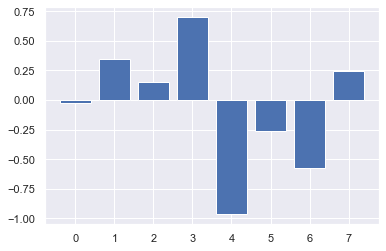

In [213]:
# get importance
from matplotlib import pyplot
importance = LDA_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [214]:
print(LDA_model.coef_)

[[-0.02562172  0.34920682  0.1503469   0.70441972 -0.96718782 -0.25856319
  -0.57234288  0.24908203]]


<b><center>Applying Grid Search CV on LDA data</center></b>

In [337]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_jobs=1, # need more disk? PickleError
                                  learning_method='online'
                               )

In [338]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_components': [6, 8, 10, 12], # Maybe we can get away with fewer n_components (memory)
    'learning_decay': [0.75, 0.80, 0.85]
}

lda_search = GridSearchCV(lda,
                          param_grid=params,
                          cv=3,
                          return_train_score=False)

In [339]:
lda_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=LatentDirichletAllocation(learning_method='online',
                                                 n_jobs=1),
             param_grid={'learning_decay': [0.75, 0.8, 0.85],
                         'n_components': [6, 8, 10, 12]})

In [341]:
print(lda_search.best_params_,'\n')
print(lda_search.best_estimator_)

{'learning_decay': 0.75, 'n_components': 6} 

LatentDirichletAllocation(learning_decay=0.75, learning_method='online',
                          n_components=6, n_jobs=1)


In [343]:
best_model = lda_search.best_estimator_

In [344]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

AttributeError: 'LatentDirichletAllocation' object has no attribute 'predict'

In [ ]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()


In [ ]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');


In [ ]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [ ]:
lda_search = GridSearchCV(lda,
                          param_grid=params,
                          cv=3,
                          return_train_score=False)
lda_search.fit(X_train,y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)
best_model = grid_search.best_estimator
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

<b>1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)</b>

<b><center>NAIVE BAYES</center></b>

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [82]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [83]:
y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))

print(metrics.classification_report(y_train,y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [84]:
print('accuracy of train dataset:',model_score)

accuracy of train dataset: 0.8331771321462043


In [85]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[240  92]
 [ 86 649]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


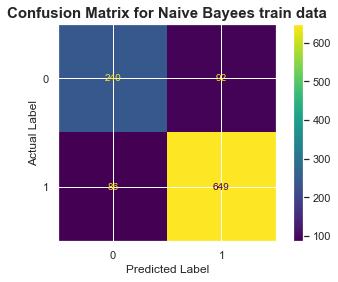

In [86]:
plot_confusion_matrix(NB_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Naive Bayees train data',fontsize=15,fontweight='bold')
plt.show()

In [87]:
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [88]:
print('accuracy of test dataset:',model_score)

accuracy of test dataset: 0.8253275109170306


In [89]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[ 94  36]
 [ 44 284]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


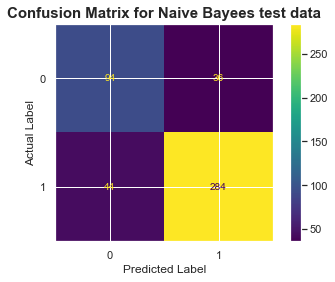

In [90]:
plot_confusion_matrix(NB_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Naive Bayees test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score: 0.886 


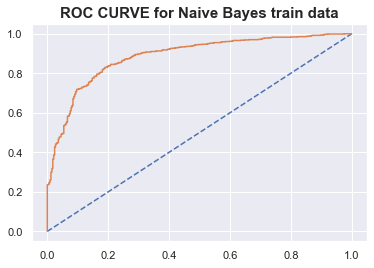

In [91]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("ROC_AUC score: %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Naive Bayes train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr,train_tpr);


ROC_AUC score: 0.885 


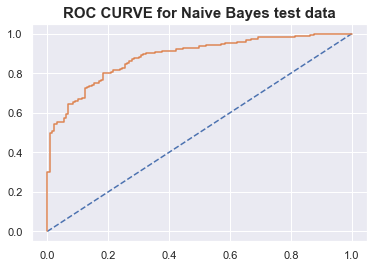

In [92]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score: %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Naive Bayes test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr)

In [95]:
# get importance
importance = NB_model.coefs_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: 'GaussianNB' object has no attribute 'coefs_'

<center><b>KNN</b></center>

In [108]:
from scipy.stats import zscore

In [109]:
X[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender_male']]=X[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender_male']].apply(zscore)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)


#default value:n_neighbours/k=5

KNeighborsClassifier()

In [111]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8537956888472352
[[242  90]
 [ 66 669]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



In [112]:
print('accuracy of train dataset:',model_score)

accuracy of train dataset: 0.8537956888472352


In [113]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[242  90]
 [ 66 669]]


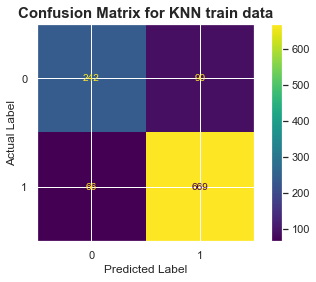

In [92]:
plot_confusion_matrix(KNN_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for KNN train data',fontsize=15,fontweight='bold')
plt.show()

In [115]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7860262008733624
[[ 81  49]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



In [116]:
print('accuracy of test dataset:',model_score)

accuracy of test dataset: 0.7860262008733624


In [95]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test, y_test_predict))

Confusion matrix for the test data
 [[ 81  49]
 [ 49 279]]


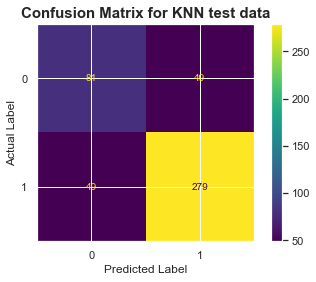

In [96]:
plot_confusion_matrix(KNN_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for KNN test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score: 0.921 


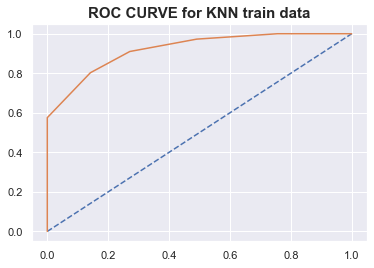

In [97]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("ROC_AUC score: %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for KNN train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr,train_tpr);

ROC_AUC score:0.835 


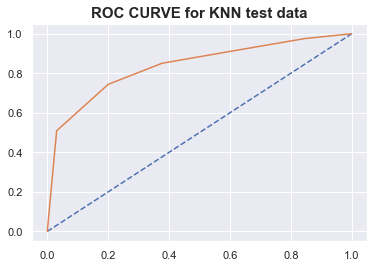

In [98]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score:%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for KNN test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);


<b><center>Applying grid Search on KNN data</center></b>

In [99]:
#for n_neighbours/k=7

In [100]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [101]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8491096532333646
[[233  99]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       332
           1       0.87      0.92      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [102]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7860262008733624
[[ 77  53]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       130
           1       0.84      0.86      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.73      0.73       458
weighted avg       0.78      0.79      0.78       458



Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [103]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.26637554585152834,
 0.23362445414847166,
 0.2139737991266376,
 0.2139737991266376,
 0.20305676855895194,
 0.20742358078602618,
 0.18777292576419213,
 0.19650655021834063,
 0.19213973799126638,
 0.19432314410480345]

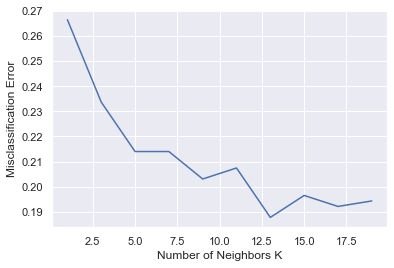

In [104]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [105]:
#for k=19

In [106]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=19)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [107]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8266166822867854
[[212 120]
 [ 65 670]]
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       332
           1       0.85      0.91      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067



In [108]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8056768558951966
[[ 82  48]
 [ 41 287]]
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       130
           1       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.76      0.75      0.76       458
weighted avg       0.80      0.81      0.80       458



In [109]:
#for k=17

In [110]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [111]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.831302717900656
[[213 119]
 [ 61 674]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       332
           1       0.85      0.92      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [112]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8078602620087336
[[ 82  48]
 [ 40 288]]
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       130
           1       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.76      0.75      0.76       458
weighted avg       0.80      0.81      0.81       458



In [117]:
#for k=13

In [118]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [119]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8294283036551078
[[215 117]
 [ 65 670]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       332
           1       0.85      0.91      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [120]:
print("Accuracy of the KNN train data for k=13",KNN_model.score(X_train, y_train))

Accuracy of the KNN train data for k=13 0.8294283036551078


In [121]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8122270742358079
[[ 83  47]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       130
           1       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



In [122]:
print("Accuracy of the KNN test data for k=13",KNN_model.score(X_test, y_test))

Accuracy of the KNN test data for k=13 0.8122270742358079


ROC_AUC score: 0.898 


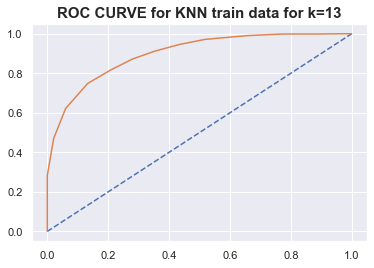

In [123]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("ROC_AUC score: %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for KNN train data for k=13',fontsize=15,fontweight='bold')
plt.plot(train_fpr,train_tpr);

ROC_AUC score:0.875 


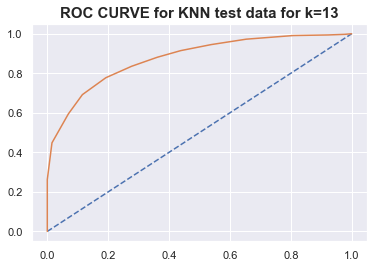

In [124]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score:%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for KNN test data for k=13',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);


Confusion matrix for the train data for k=13
 [[215 117]
 [ 65 670]]


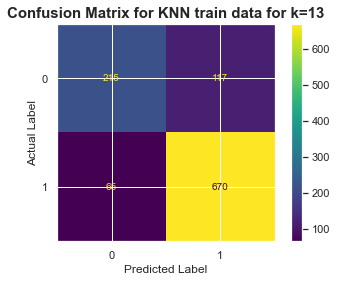

In [125]:
print('Confusion matrix for the train data for k=13\n',metrics.confusion_matrix(y_train,y_train_predict))
plot_confusion_matrix(KNN_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for KNN train data for k=13',fontsize=15,fontweight='bold')
plt.show()

Confusion matrix for the test data for k=13
 [[ 83  47]
 [ 39 289]]


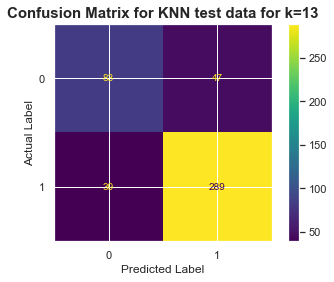

In [126]:
print('Confusion matrix for the test data for k=13\n',metrics.confusion_matrix(y_test, y_test_predict))
plot_confusion_matrix(KNN_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for KNN test data for k=13',fontsize=15,fontweight='bold')
plt.show()

In [122]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
# get importance
importance = KNN_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

<b>As the difference between train and test accuracies is less than 10%, it is a valid model</b>

<b>1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.</b>

<b><center>ADA BOOST</center></b>

In [150]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [151]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [152]:
print('accuracy of train dataset:',model_score)

accuracy of train dataset: 0.8472352389878163


In [153]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[238  94]
 [ 69 666]]


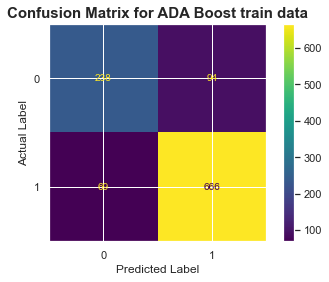

In [154]:
plot_confusion_matrix(ADB_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for ADA Boost train data',fontsize=15,fontweight='bold')
plt.show()

In [155]:
y_test_prob=ADB_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.504648,0.495352
1,0.502908,0.497092
2,0.499251,0.500749
3,0.500577,0.499423
4,0.495703,0.504297


ROC_AUC score: 0.913


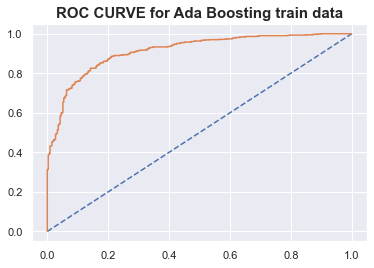

In [156]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Ada Boosting train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

In [157]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [158]:
print('accuracy of test dataset:',model_score)

accuracy of test dataset: 0.8187772925764192


In [159]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[ 90  40]
 [ 43 285]]


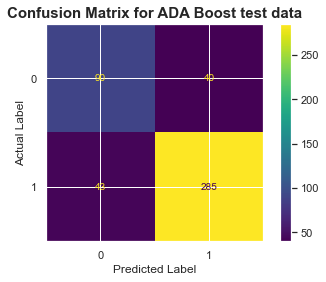

In [160]:
plot_confusion_matrix(ADB_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for ADA Boost test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score:0.879 


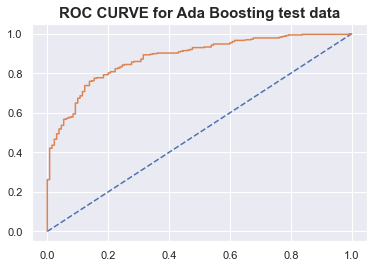

In [161]:
probs_test=ADB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score:%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Ada Boosting test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);


AUC: 0.913
AUC :0.879 


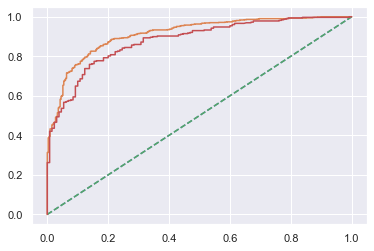

In [162]:


# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

probs_test=ADB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("AUC :%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);


<b><center>GRADIENT BOOSTING</center></b>

In [167]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [168]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [169]:
print('accuracy of train dataset:',model_score)

accuracy of train dataset: 0.8865979381443299


In [170]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[262  70]
 [ 51 684]]


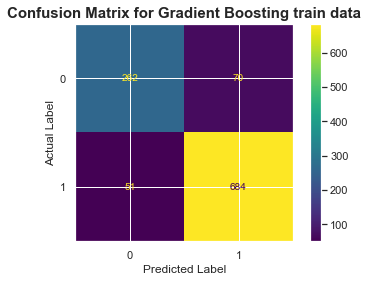

In [171]:
plot_confusion_matrix(gbcl,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Gradient Boosting train data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score: 0.950


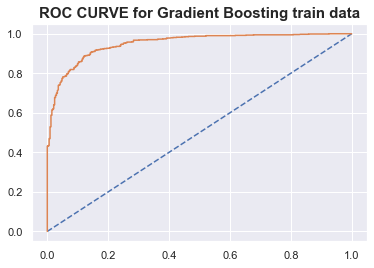

In [172]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Gradient Boosting train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);


In [173]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



In [174]:
print('accuracy of test dataset:',model_score)

accuracy of test dataset: 0.8318777292576419


In [175]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[ 96  34]
 [ 43 285]]


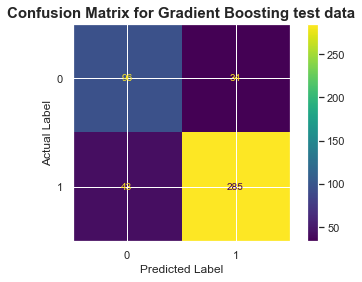

In [176]:
plot_confusion_matrix(gbcl,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Gradient Boosting test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score :0.904 


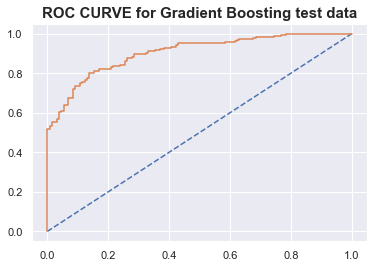

In [177]:
probs_test=gbcl.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score :%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Gradient Boosting test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);

<b><center>DECISION TREE</center></b>

In [421]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [422]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[332   0]
 [  1 734]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [423]:
print('accuracy of train dataset:',model_score)

accuracy of train dataset: 0.9990627928772259


In [424]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[332   0]
 [  1 734]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


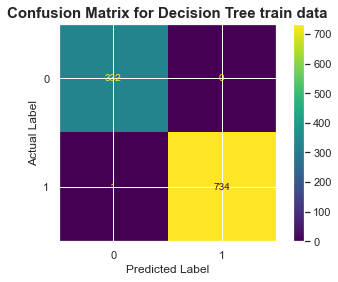

In [425]:
plot_confusion_matrix(DT_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Decision Tree train data',fontsize=15,fontweight='bold')
plt.show()

In [426]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7489082969432315
[[ 78  52]
 [ 63 265]]
              precision    recall  f1-score   support

           0       0.55      0.60      0.58       130
           1       0.84      0.81      0.82       328

    accuracy                           0.75       458
   macro avg       0.69      0.70      0.70       458
weighted avg       0.76      0.75      0.75       458



In [427]:
print('accuracy of test dataset:',model_score)

accuracy of test dataset: 0.7489082969432315


In [429]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[ 78  52]
 [ 63 265]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


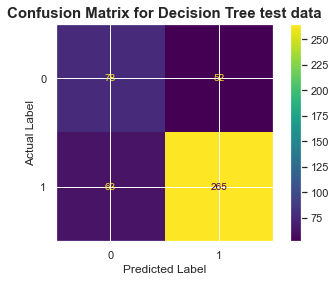

In [430]:
plot_confusion_matrix(DT_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Decision Tree test data',fontsize=15,fontweight='bold')
plt.show()

<b><center>RANDOM FOREST</center></b>

In [24]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [25]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [26]:
print('accuracy of train dataset:',model_score)

accuracy of train dataset: 0.9990627928772259


In [27]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[331   1]
 [  0 735]]


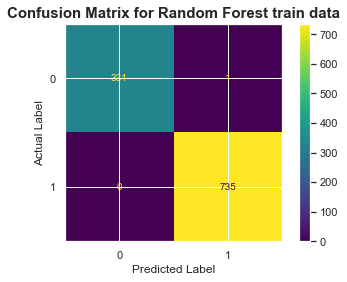

In [28]:
plot_confusion_matrix(RF_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Random Forest train data',fontsize=15,fontweight='bold')
plt.show()

In [29]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 90  40]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [30]:
print('accuracy of test dataset:',model_score)

accuracy of test dataset: 0.8209606986899564


In [31]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[ 90  40]
 [ 42 286]]


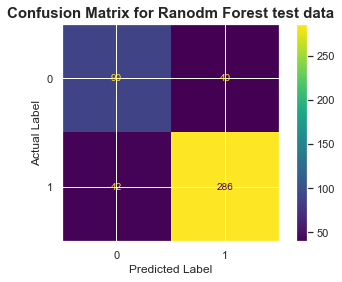

In [32]:
plot_confusion_matrix(RF_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Ranodm Forest test data',fontsize=15,fontweight='bold')
plt.show()

<b>APLLYING GRID SEARCH CV ON RANDOM FOREST</b>

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [35]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [36]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 100}

In [37]:
best_grid = grid_search.best_estimator_

In [55]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, random_state=0)

In [56]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [57]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       332
           1       0.86      0.92      0.89       735

    accuracy                           0.84      1067
   macro avg       0.83      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [58]:
# Confusion matrix

#from sklearn.metrics import classification_report,confusion_matrix
#confusion_matrix(y_train, ytrain_predict)

#cm = confusion_matrix(y_train, ytrain_predict, labels=[1,0])
#labels = ['True Neg','False Pos','False Neg','True Pos']
#categories = ['Zero','One']
#make_confusion_matrix(cm, 
 #                     group_names=labels,
 #                     categories=categories, 
  #                    cmap='binary')


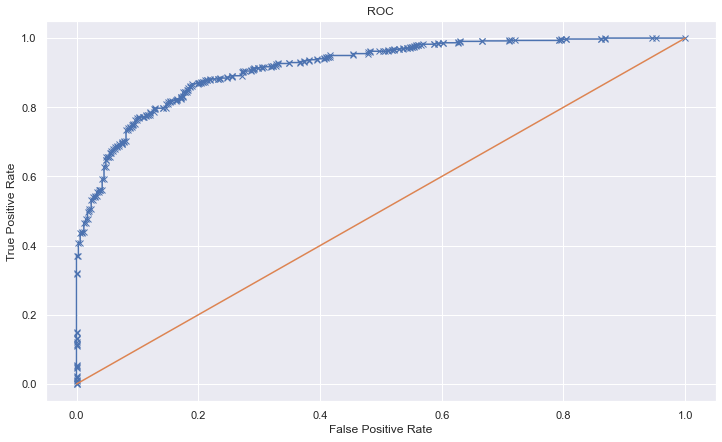

Area under Curve is 0.914855339726252


In [59]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

In [60]:
confusion_matrix(y_test,ytest_predict)

array([[ 78,  52],
       [ 37, 291]], dtype=int64)

In [61]:
# Confusion matrix

#from sklearn.metrics import classification_report,confusion_matrix
#confusion_matrix(test_labels,ytest_predict)

#cm = confusion_matrix(test_labels, ytest_predict, labels=[1,0])
#labels = ['True Neg','False Pos','False Neg','True Pos']
#categories = ['Zero','One']
#make_confusion_matrix(cm, 
 #                     group_names=labels,
  #                    categories=categories, 
    #                  cmap='binary')

In [62]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       130
           1       0.85      0.89      0.87       328

    accuracy                           0.81       458
   macro avg       0.76      0.74      0.75       458
weighted avg       0.80      0.81      0.80       458



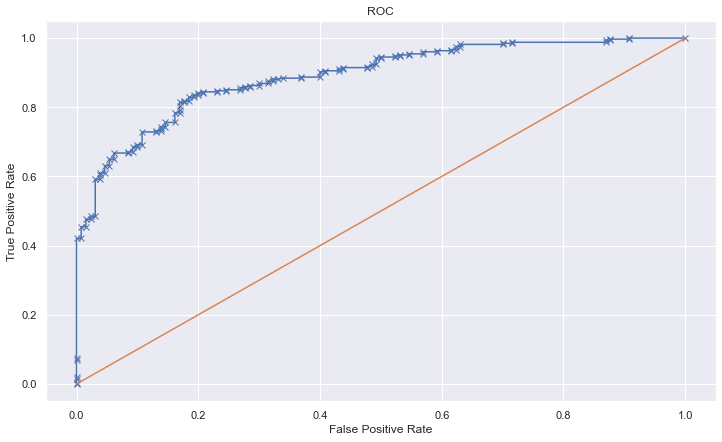

Area under Curve is 0.891076454033771


In [63]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

<b><center>BAGGING ON CART</center></b>

In [442]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [443]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [444]:
print('accuracy of train dataset:',model_score)

accuracy of train dataset: 0.9990627928772259


In [445]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[331   1]
 [  0 735]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


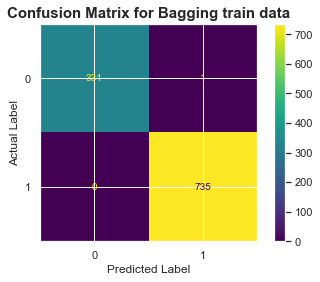

In [446]:
plot_confusion_matrix(Bagging_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Bagging train data',fontsize=15,fontweight='bold')
plt.show()

In [447]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7991266375545851
[[ 84  46]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



In [448]:
print('accuracy of test dataset:',model_score)

accuracy of test dataset: 0.7991266375545851


In [450]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[ 84  46]
 [ 46 282]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


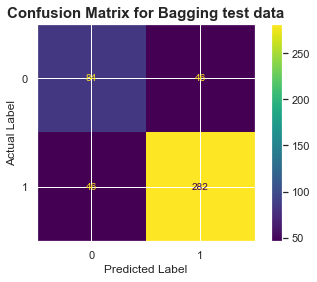

In [451]:
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Bagging test data',fontsize=15,fontweight='bold')
plt.show()

<b><center>BAGGING ON RANDOM FOREST</center></b>

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,max_depth=10,min_samples_leaf=10,
                       min_samples_split=50,  random_state=0,max_features=6)
rfcl = rfcl.fit(X_train, y_train)
  #n- estimators s the number of trees in the forest

0.8122270742358079


<AxesSubplot:>

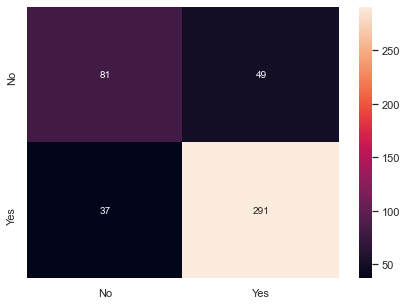

In [322]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [124]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=6)
#rfcl = rfcl.fit(X_train, y_train)
rfcl = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=0)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=0)

In [125]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9653233364573571
[[304  28]
 [  9 726]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



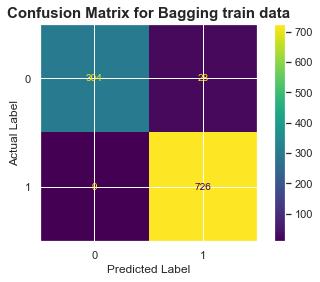

In [130]:
plot_confusion_matrix(Bagging_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Bagging train data',fontsize=15,fontweight='bold')
plt.show()

In [126]:
print("Accuracy on Bagging train data:",Bagging_model.score(X_train, y_train))

Accuracy on Bagging train data: 0.9653233364573571


In [127]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 91  39]
 [ 38 290]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



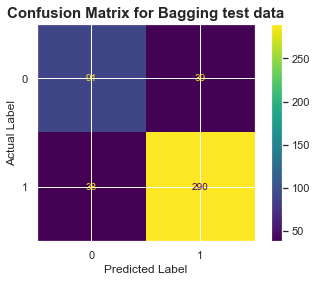

In [131]:
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Bagging test data',fontsize=15,fontweight='bold')
plt.show()

In [128]:
print("Accuracy on Bagging test data:",Bagging_model.score(X_test, y_test))

Accuracy on Bagging test data: 0.8318777292576419


ROC_AUC score: 0.997


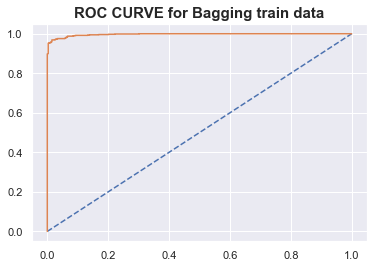

In [133]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Bagging train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);


ROC_AUC score :0.897 


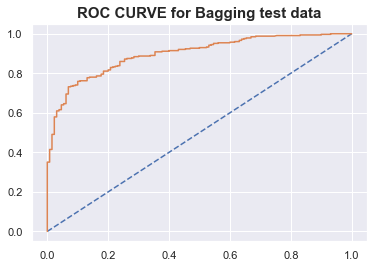

In [134]:
probs_test=Bagging_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score :%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Bagging test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);

<b><center>CROSS VALIDATION ON ALL THE ABOVE CREATED MODELS</center></b>

<b>1.LOGISTIC REGRESSION</b>

In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logistic_model, X_train, y_train, cv=10)
scores

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

array([0.78504673, 0.82242991, 0.86915888, 0.85046729, 0.8317757 ,
       0.82242991, 0.78504673, 0.9245283 , 0.83018868, 0.80188679])

In [81]:
scores = cross_val_score(Logistic_model, X_test, y_test, cv=10)
scores

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

array([0.82608696, 0.86956522, 0.80434783, 0.7826087 , 0.82608696,
       0.80434783, 0.84782609, 0.89130435, 0.88888889, 0.75555556])

<b>2.LDA</b>

In [309]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LDA_model, X_train, y_train, cv=10)
scores

array([0.78504673, 0.82242991, 0.85981308, 0.8317757 , 0.8411215 ,
       0.82242991, 0.80373832, 0.9245283 , 0.82075472, 0.80188679])

In [310]:
scores = cross_val_score(LDA_model, X_test, y_test, cv=10)
scores

array([0.82608696, 0.84782609, 0.80434783, 0.80434783, 0.82608696,
       0.80434783, 0.84782609, 0.84782609, 0.91111111, 0.75555556])

<b>3.NAIVE BAYES</b>

In [128]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_model, X_train, y_train, cv=10)
scores

array([0.81308411, 0.8317757 , 0.82242991, 0.85046729, 0.82242991,
       0.81308411, 0.81308411, 0.88679245, 0.82075472, 0.81132075])

In [127]:
scores = cross_val_score(NB_model, X_test, y_test, cv=10)
scores

array([0.82608696, 0.84782609, 0.82608696, 0.80434783, 0.76086957,
       0.80434783, 0.84782609, 0.91304348, 0.88888889, 0.82222222])

<b>4.KNN</b>

In [311]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_model, X_train, y_train, cv=10)
scores

array([0.79439252, 0.76635514, 0.78504673, 0.81308411, 0.81308411,
       0.77570093, 0.73831776, 0.83018868, 0.8490566 , 0.80188679])

In [312]:
scores = cross_val_score(KNN_model, X_test, y_test, cv=10)
scores

array([0.76086957, 0.80434783, 0.73913043, 0.7826087 , 0.82608696,
       0.76086957, 0.80434783, 0.76086957, 0.84444444, 0.73333333])

<b>5.ADA BOOSTING</b>

In [165]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ADB_model, X_train, y_train, cv=10)
scores

array([0.78504673, 0.77570093, 0.82242991, 0.86915888, 0.82242991,
       0.82242991, 0.81308411, 0.88679245, 0.83018868, 0.79245283])

In [166]:
scores = cross_val_score(ADB_model, X_test, y_test, cv=10)
scores

array([0.82608696, 0.82608696, 0.7826087 , 0.76086957, 0.76086957,
       0.76086957, 0.82608696, 0.82608696, 0.88888889, 0.77777778])

<b>6.GRADIENT BOOSTING</b>

In [178]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbcl, X_train, y_train, cv=10)
scores

array([0.76635514, 0.77570093, 0.8411215 , 0.8411215 , 0.8317757 ,
       0.81308411, 0.81308411, 0.90566038, 0.82075472, 0.79245283])

In [179]:
scores = cross_val_score(gbcl, X_test, y_test, cv=10)
scores

array([0.82608696, 0.86956522, 0.82608696, 0.76086957, 0.7826087 ,
       0.84782609, 0.80434783, 0.91304348, 0.8       , 0.8       ])

<b>7.RANDOM FOREST</b>

In [313]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_model, X_train, y_train, cv=10)
scores

array([0.78504673, 0.79439252, 0.81308411, 0.82242991, 0.85981308,
       0.80373832, 0.80373832, 0.89622642, 0.80188679, 0.83018868])

In [314]:
scores = cross_val_score(RF_model, X_test, y_test, cv=10)
scores

array([0.80434783, 0.84782609, 0.82608696, 0.84782609, 0.76086957,
       0.82608696, 0.91304348, 0.84782609, 0.86666667, 0.82222222])

<b>8.BAGGING ON RANDOM FOREST</b>

In [320]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Bagging_model, X_train, y_train, cv=10)
scores

array([0.79439252, 0.80373832, 0.82242991, 0.8317757 , 0.8317757 ,
       0.80373832, 0.81308411, 0.89622642, 0.81132075, 0.82075472])

In [335]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=10)
scores

array([0.82608696, 0.80434783, 0.82608696, 0.84782609, 0.7826087 ,
       0.82608696, 0.93478261, 0.91304348, 0.86666667, 0.82222222])

In [ ]:
<b></b>

<b>1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)</b>

<b>1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.</b>

<center><b>TEXT ANALYTICS</b></center>

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

<br>1.President Franklin D. Roosevelt in 1941</br>
<br>2.President John F. Kennedy in 1961</br>
<br>3.President Richard Nixon in 1973</br>

In [127]:
!pip install wordcloud

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import string # this is used for string manipulations


In [4]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [5]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [6]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [7]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.19.1
Pandas version: 1.2.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.1
Matplotlib version: 3.3.4


<b>2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)</b>

In [9]:
from nltk.tokenize import sent_tokenize
text=inaugural.raw('1941-Roosevelt.txt')
tokenized_text=sent_tokenize(text)

In [10]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)

In [11]:
len(tokenized_word)

1526

In [12]:
from nltk.tokenize import sent_tokenize
text1=inaugural.raw('1961-Kennedy.txt')
tokenized_text=sent_tokenize(text1)
from nltk.tokenize import word_tokenize
tokenized_word1=word_tokenize(text1)
len(tokenized_word1)

1543

In [13]:
from nltk.tokenize import sent_tokenize
text2=inaugural.raw('1973-Nixon.txt')
tokenized_text2=sent_tokenize(text2)
from nltk.tokenize import word_tokenize
tokenized_word2=word_tokenize(text2)
len(tokenized_word2)

2006

In [14]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [15]:
inaugural_speech

,president,text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


<b>2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)</b>

In [16]:
#number of words
inaugural_speech['char_count'] = inaugural_speech['text'].str.len() ## this also includes spaces
inaugural_speech

,president,text,char_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [17]:
#number of words
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,president,text,char_count,word_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769


In [18]:
#number of sentences
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,president,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769,68


<b>2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.</b>

In [19]:
#Lower case conversion
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text'].head()

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [20]:
#removal of punctuations
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
inaugural_speech['text'].head()

<ipython-input-20-76b7ccc9477b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')


1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [22]:
#Removal of stopwords

from nltk.corpus import stopwords
stop_words= stopwords.words('english')
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech['text'].head()

1941-Roosevelt    national day inauguration since 1789 people re...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [23]:
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [24]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech

,president,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt - 1941,national day inauguration since 1789 people re...,7571,1323,68
1961-Kennedy,Kennedy - 1961,vice president johnson speaker chief justice p...,7618,1364,52
1973-Nixon,Nixon - 1973,vice president speaker chief justice senator c...,9991,1769,68


In [33]:
#removal of stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
#inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
#inaugural_speech[['text','word_count']].head()
inaugural_speech['char_count'] = inaugural_speech['text'].str.len() ## this also includes spaces
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
inaugural_speech

,president,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt - 1941,national day inauguration since 1789 people re...,4556,617,1
1961-Kennedy,Kennedy - 1961,vice president johnson speaker chief justice p...,4635,658,1
1973-Nixon,Nixon - 1973,vice president speaker chief justice senator c...,5733,775,1


In [31]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech[['text','char_count']].head()

,text,char_count
1941-Roosevelt,national day inauguration since 1789 people re...,4556
1961-Kennedy,vice president johnson speaker chief justice p...,4635
1973-Nixon,vice president speaker chief justice senator c...,5733


In [32]:
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech[['text','sents_count']].head()

,text,sents_count
1941-Roosevelt,national day inauguration since 1789 people re...,1
1961-Kennedy,vice president johnson speaker chief justice p...,1
1973-Nixon,vice president speaker chief justice senator c...,1


In [89]:
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [90]:
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

In [91]:
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintaining peac

<b>2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)</b>

In [105]:
print("Top three words in the 1941-Roosevelt speech")
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:3]
freq
#inaugural_speech.iloc[0:1,0] 
# 1941-Roosevelt

Top three words in the 1941-Roosevelt speech


nation       11
know         10
democracy     9
dtype: int64

In [106]:
print("Top three words in the 1961-Kennedy speech")
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:3]
freq
#inaugural_speech.iloc[1:2,0]
# 1961-Kennedy

Top three words in the 1961-Kennedy speech


sides    8
world    8
new      7
dtype: int64

In [108]:
print("Top three words in the  1973-Nixon speech")
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:3]
freq
#inaugural_speech.iloc[1:2,0]
# 1973-Nixon

Top three words in the  1973-Nixon speech


peace    19
world    16
new      15
dtype: int64

<b>2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)</b>

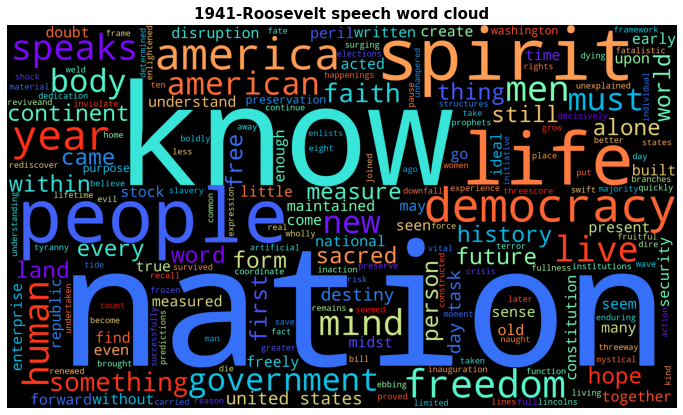

In [110]:
from wordcloud import WordCloud,STOPWORDS
#new_df=inaugural_speech.iloc[0:1,0]
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("1941-Roosevelt speech word cloud",fontsize=15,fontweight='bold')
plt.axis('off')
plt.show()

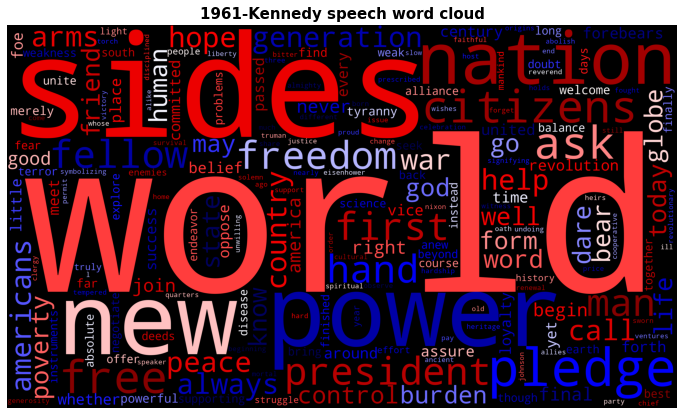

In [111]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("1961-Kennedy speech word cloud",fontsize=15,fontweight='bold')
plt.axis('off')
plt.show()

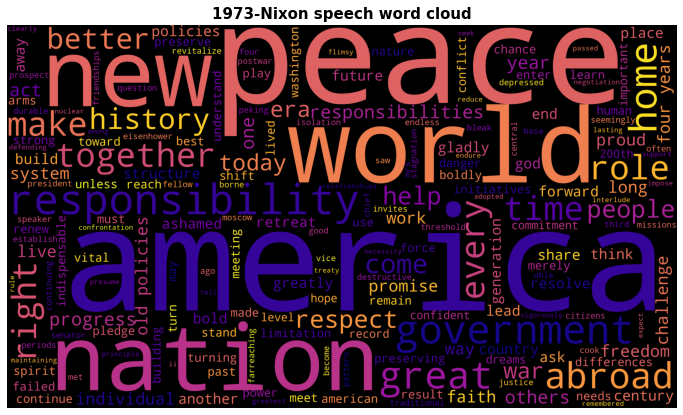

In [112]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'plasma',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("1973-Nixon speech word cloud",fontsize=15,fontweight='bold')
plt.axis('off')
plt.show()